# **Initializations**



This notebook will deal with gaps in the field of suicides around the world. We want to examine the connections and present visualizations regarding various areas that can affect suicide rates. We will investigate the connection between suicides and age group, gender, continent, economic status of the country, number of facilities and professionals in the country's mental health, and the country's geographical location (equator = golden hours per day). 


In [ ]:
# install needed packages
!pip install turicreate
!pip install spaCy
!pip install pymongo
!pip install geopandas
!pip install descartes
!pip install geopy
!pip install folium
!pip install imageio
!pip install kaggle

# Run this to make cartopy work with colab 
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip install --no-binary shapely shapely --force


     |████████████████████████████████| 92.0MB 50kB/s 
     |████████████████████████████████| 3.6MB 45.7MB/s 
     |████████████████████████████████| 327kB 54.0MB/s 
     |████████████████████████████████| 3.5MB 42.0MB/s 
     |████████████████████████████████| 86.4MB 49kB/s 
     |████████████████████████████████| 18.3MB 276kB/s 
     |████████████████████████████████| 450kB 50.7MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 3.8MB 51.5MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp37-none-any.whl size=320845 sha256=7621ffcc28d60670dec8073100be0524c8761238060f41374e624499632009d8
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for prettytable: filename=prettytable-0.7.2-cp37-none-any.whl size=13700 sha256=ca800b374e3f35772f78bd1dc3f072e19721d108f7ddefbbc6806457ba90f3da
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb5951

In [ ]:
!mkdir /root/.kaggle/ 
import json
import os

api_token = {"username":"","key":""}
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import kaggle
import pandas as pd

In [ ]:
!mkdir ./datasets

!kaggle datasets download twinkle0705/mental-health-and-suicide-rates -p ./datasets/mental-health-and-suicide-rates
!unzip ./datasets/mental-health-and-suicide-rates/*.zip -d ./datasets/mental-health-and-suicide-rates
!kaggle datasets download russellyates88/suicide-rates-overview-1985-to-2016 -p ./datasets/suicide-rates-overview-1985-to-2016
!unzip ./datasets/suicide-rates-overview-1985-to-2016/*.zip -d ./datasets/suicide-rates-overview-1985-to-2016

!kaggle datasets download szamil/who-suicide-statistics -p ./datasets/who-suicide-statistics
!unzip ./datasets/who-suicide-statistics/*.zip -d ./datasets/who-suicide-statistics

!kaggle datasets download ashydv/country-socioeconomic-data -p ./datasets/country-socioeconomic-data
!unzip ./datasets/country-socioeconomic-data/*.zip -d ./datasets/country-socioeconomic-data

  0% 0.00/20.7k [00:00<?, ?B/s]
100% 20.7k/20.7k [00:00<00:00, 40.8MB/s]
Archive:  ./datasets/mental-health-and-suicide-rates/mental-health-and-suicide-rates.zip
  inflating: ./datasets/mental-health-and-suicide-rates/Age-standardized suicide rates.csv  
  inflating: ./datasets/mental-health-and-suicide-rates/Crude suicide rates.csv  
  inflating: ./datasets/mental-health-and-suicide-rates/Facilities.csv  
  inflating: ./datasets/mental-health-and-suicide-rates/Human Resources.csv  
  0% 0.00/397k [00:00<?, ?B/s]
100% 397k/397k [00:00<00:00, 55.2MB/s]
Archive:  ./datasets/suicide-rates-overview-1985-to-2016/suicide-rates-overview-1985-to-2016.zip
  inflating: ./datasets/suicide-rates-overview-1985-to-2016/master.csv  
  0% 0.00/304k [00:00<?, ?B/s]
100% 304k/304k [00:00<00:00, 43.5MB/s]
Archive:  ./datasets/who-suicide-statistics/who-suicide-statistics.zip
  inflating: ./datasets/who-suicide-statistics/who_suicide_statistics.csv  
  0% 0.00/5.21k [00:00<?, ?B/s]
100% 5.21k/5.21k [00:00

In [ ]:

facilities_df = pd.read_csv("/content/datasets/mental-health-and-suicide-rates/Facilities.csv")
facilities_df

suicide_who_df = pd.read_csv("/content/datasets/who-suicide-statistics/who_suicide_statistics.csv")
suicide_who_df

suicide_master_df = pd.read_csv("/content/datasets/suicide-rates-overview-1985-to-2016/master.csv")
suicide_master_df
#['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']

age_suicide_df = pd.read_csv("/content/datasets/mental-health-and-suicide-rates/Age-standardized suicide rates.csv")
age_suicide_df
# [Country,	Sex, 2016, 2015, 2010, 2000]

crude_suicide_df = pd.read_csv("/content/datasets/mental-health-and-suicide-rates/Crude suicide rates.csv")
crude_suicide_df
# [Country, Sex, 80_above, 70to79, 60to69, 50to59, 40to49, 30to39, 20to29, 10to19]

hr_suicide_df = pd.read_csv("/content/datasets/mental-health-and-suicide-rates/Human Resources.csv")
hr_suicide_df
# ['Country', 'Year', 'Psychiatrists', 'Nurses', 'Social_workers', 'Psychologists']

country_socioeconomic_df = pd.read_csv("/content/datasets/country-socioeconomic-data/Country-data.csv")
country_socioeconomic_df
# ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
suicide_who_df.rename({'sex' : 'gender', 'suicides_no' : 'suicides'}, inplace = True, axis = 1)
suicide_who_df['population'].mean()


1664091.1353742562

In [ ]:
# filling missing values

suicide_who_df['suicides'].fillna(0, inplace = True)
suicide_who_df['population'].fillna(1664090, inplace = True)

# checking if there is any null value left
suicide_who_df.isnull().sum().sum()

# converting these attributes into integer format
suicide_who_df['suicides'] = suicide_who_df['suicides'].astype(int)
suicide_who_df['population'] = suicide_who_df['population'].astype(int)
suicide_who_df

,country,year,gender,age,suicides,population
0,Albania,1985,female,15-24 years,0,277900
1,Albania,1985,female,25-34 years,0,246800
2,Albania,1985,female,35-54 years,0,267500
3,Albania,1985,female,5-14 years,0,298300
4,Albania,1985,female,55-74 years,0,138700
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150,1664090
43772,Zimbabwe,1990,male,35-54 years,132,1664090
43773,Zimbabwe,1990,male,5-14 years,6,1664090
43774,Zimbabwe,1990,male,55-74 years,74,1664090


In [ ]:
# use plotly express gapminder dataset, to get countries' iso alpha codes
import plotly.express as px

df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [ ]:
# lets reduce and group the data by country and year
small_df = suicide_who_df[['country', 'year', 'suicides', 'population']].groupby(['country','year']).agg('sum')
small_df = small_df.reset_index()


# calculate the percentage of suicides from population
small_df['percentage_of_suicide_in_pop'] = small_df.apply(lambda row: row.suicides / row.population, axis=1)
small_df

,country,year,suicides,population,percentage_of_suicide_in_pop
0,Albania,1985,0,2605100,0.000000
1,Albania,1986,0,2656000,0.000000
2,Albania,1987,73,2709600,0.000027
3,Albania,1988,63,2764300,0.000023
4,Albania,1989,68,2803100,0.000024
...,...,...,...,...,...
3643,Virgin Islands (USA),2010,8,98658,0.000081
3644,Virgin Islands (USA),2011,8,98290,0.000081
3645,Virgin Islands (USA),2012,10,98069,0.000102
3646,Virgin Islands (USA),2015,3,97951,0.000031


In [ ]:
df_ = df[['country', 'iso_alpha']]
g = df_[['country', 'iso_alpha']].groupby('country').agg(max)

full = small_df.merge(g, on='country', how='right')
s = full.dropna()

s['year'] = s['year'].astype(int)
s.head(60)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,year,suicides,population,percentage_of_suicide_in_pop,iso_alpha
1,Albania,1985,0.0,2605100.0,0.000000,ALB
2,Albania,1986,0.0,2656000.0,0.000000,ALB
3,Albania,1987,73.0,2709600.0,0.000027,ALB
4,Albania,1988,63.0,2764300.0,0.000023,ALB
5,Albania,1989,68.0,2803100.0,0.000024,ALB
6,Albania,1990,0.0,2902700.0,0.000000,ALB
7,Albania,1991,0.0,2884300.0,0.000000,ALB
8,Albania,1992,47.0,2822500.0,0.000017,ALB
9,Albania,1993,73.0,2807300.0,0.000026,ALB
10,Albania,1994,50.0,2849300.0,0.000018,ALB


# **Suicides by Country**

The first and most natural factor for testing is the country in which a person lives. This section will present the average percentage of suicides by country on the world map and the percentage of suicides per year on a map, with timeline animation. All suicide rates are calculated relative to population size.

In [ ]:
countries_suicide_prec = s[['country', 'percentage_of_suicide_in_pop', 'iso_alpha']].groupby(['country']).agg('mean')
countries_suicide_prec = countries_suicide_prec.reset_index()
countries_suicide_prec

,country,percentage_of_suicide_in_pop
0,Albania,2.226247e-05
1,Argentina,7.854318e-05
2,Australia,1.253374e-04
3,Austria,2.113624e-04
4,Bahrain,2.896571e-05
...,...,...
71,Tunisia,8.012387e-07
72,Turkey,2.093994e-05
73,United Kingdom,7.904693e-05
74,Uruguay,1.441820e-04


In [ ]:
from plotly.offline import init_notebook_mode, iplot

count = [ dict(
        type = 'choropleth',
        locations = countries_suicide_prec['country'],
        locationmode='country names',
        z = countries_suicide_prec['percentage_of_suicide_in_pop'],
        text = countries_suicide_prec['country'],
        colorscale = 'Viridis',
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
)]
layout = dict(
    title = 'Average Suicide Rates around the globe',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(
            type = 'orthographic'
        )
    )
)
fig = dict( data=count, layout=layout )
iplot(fig, validate=False, filename='d3-world-map')

The above 3D globe presents the average suicide rates over the years. At a glance, we can see that in the European continent, the suicide rate is higher. It also seems that the northern hemisphere has a higher suicide rate.

In [ ]:
import plotly.express as px

# remove rows with 0 suicides
s = s[s['suicides'] != 0]

s.sort_values(by= ["year"], inplace= True)
fig = px.choropleth(s,
                    locations="iso_alpha", 
                    color="percentage_of_suicide_in_pop", 
                    hover_name="country",
                    animation_frame="year", 
                    range_color=[0,0.0003],
                    color_continuous_scale=px.colors.sequential.Cividis_r
                    )
fig.show()

In [ ]:
# lets check in which year is the highest number of suicides
higher_years = s[['suicides','year']].groupby(['year']).agg('sum').sort_values(by = 'suicides',
                                                        ascending = False).head(10)
higher_years['suicides'] =higher_years['suicides'].astype(int)
higher_years_styled = higher_years.style.background_gradient(cmap = 'Wistia')
higher_years_styled
                                                    

,suicides
year,
2003,137199
2002,135238
2000,135197
1999,134938
2009,133169
2011,131945
2010,131771
1998,130535
2006,130100


In [ ]:
# lets check in which year is the lowest number of suicides
lower_years = s[['suicides','year']].groupby(['year']).agg('sum').sort_values(by = 'suicides',
                                                        ascending = True).head(10)
lower_years['suicides'] =lower_years['suicides'].astype(int)
lower_years_styled = lower_years.style.background_gradient(cmap = 'Wistia')
lower_years_styled

,suicides
year,
2016,14685
1979,64217
1980,76431
1981,77707
1982,80059
1989,90870
1988,91076
1983,91946
1984,93577


In [ ]:
# Countries with least number of suicides

countries_max = s[['country',
      'suicides']].groupby(['country']).agg('sum').sort_values(by = 'suicides',
                                                               ascending = True).head(10)
countries_max['suicides'] =countries_max['suicides'].astype(int)
countries_max_styled = countries_max.style.background_gradient(cmap = 'gist_yarg')
countries_max_styled                                                         

,suicides
country,
Iraq,3
Sao Tome and Principe,4
Haiti,28
Tunisia,32
Oman,33
Bolivia,54
Jordan,87
Saudi Arabia,135
Jamaica,198


In [ ]:
# Top 10 Countries with highest Suicides numbers

countries_max = s[['country',
      'suicides']].groupby(['country']).agg('sum').sort_values(by = 'suicides',
                                                               ascending = False).head(10)
countries_max['suicides'] =countries_max['suicides'].astype(int)
countries_max_styled = countries_max.style.background_gradient(cmap = 'copper')
countries_max_styled                                                         

,suicides
country,
Japan,937614
France,395500
Germany,291262
Brazil,250824
Poland,172562
United Kingdom,166314
Italy,157074
Hungary,130018
Thailand,129899


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



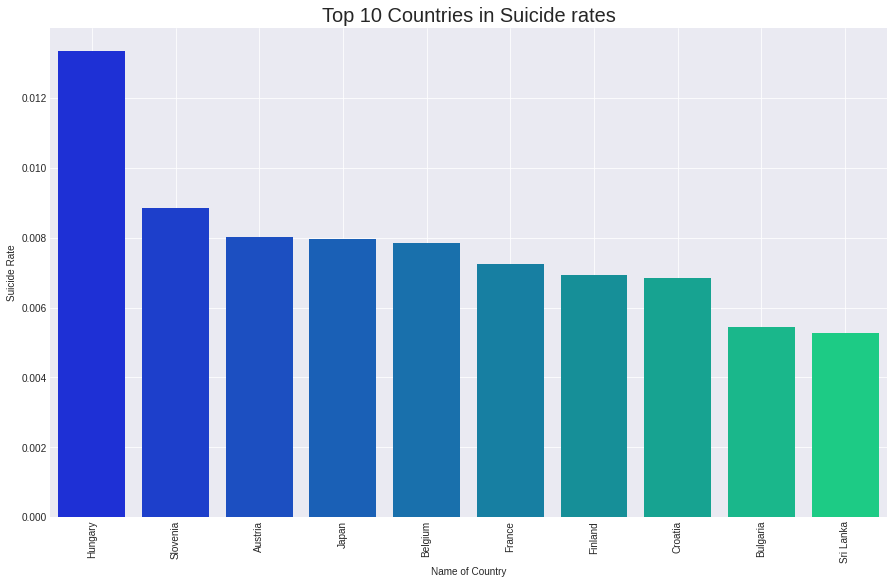

In [ ]:
# visualising the different countries distribution in the dataset

import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (15, 9)

color = plt.cm.winter(np.linspace(0, 10, 100))
x = pd.DataFrame(s.groupby(['country'])['percentage_of_suicide_in_pop'].sum().reset_index())
x.sort_values(by = ['percentage_of_suicide_in_pop'], ascending = False, inplace = True)

sns.barplot(x['country'].head(10), y = x['percentage_of_suicide_in_pop'].head(10), data = x, palette = 'winter')
plt.title('Top 10 Countries in Suicide rates', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ylabel('Suicide Rate')
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



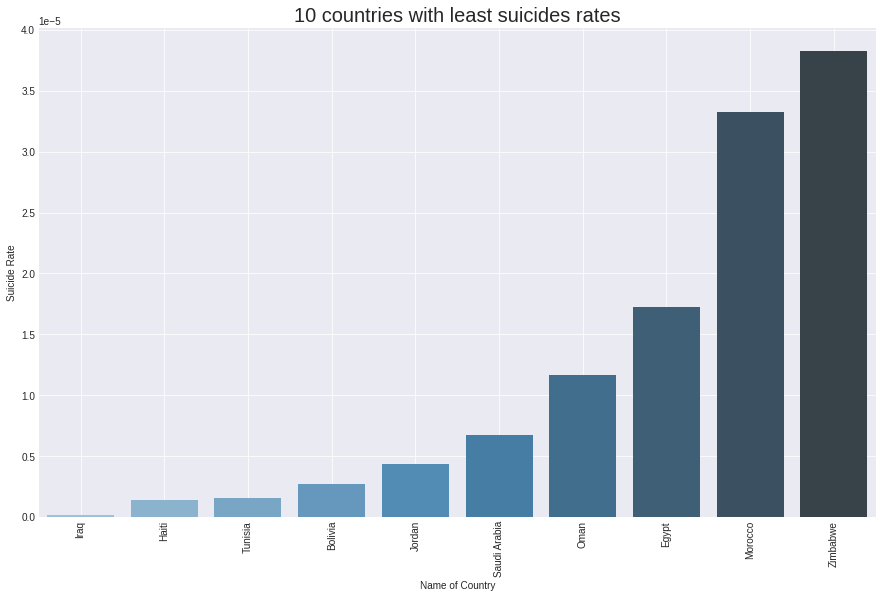

In [ ]:
# visualising the different countries distribution in the dataset

import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (15, 9)

color = plt.cm.winter(np.linspace(0, 10, 100))
x = pd.DataFrame(s.groupby(['country'])['percentage_of_suicide_in_pop'].sum().reset_index())
x.sort_values(by = ['percentage_of_suicide_in_pop'], ascending = True, inplace = True)

sns.barplot(x['country'].head(10), y = x['percentage_of_suicide_in_pop'].head(10), data = x, palette = 'Blues_d')
plt.title('10 countries with least suicides rates', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ylabel('Suicide Rate')
plt.grid()
plt.show()


To summarize the countries section, it is surprisingly noticeable that the leading countries in suicide rates are advanced and developed. However, these countries are in a high place in wealth, education, technological progress, the standard of living, and prestige.
This can be explained by high expectations from society leading to depression, economic pressure to finance the accepted standard of living in the country, various drug and alcohol addictions, and because the government is developed, the documentation is more accurate.

Also, most countries with the lowest suicide rate are poorer, smaller, and more religious countries. It can be assumed that in religious countries, suicides are prohibited and therefore occur less frequently and are less documented.

# **Suicides by gender**

In [ ]:
gender_df = suicide_who_df[['country', 'year','gender', 'suicides', 'population']].groupby(['country','year', 'gender']).agg('sum')
gender_df = gender_df.reset_index()
gender_df

,country,year,gender,suicides,population
0,Albania,1985,female,0,1263400
1,Albania,1985,male,0,1341700
2,Albania,1986,female,0,1290500
3,Albania,1986,male,0,1365500
4,Albania,1987,female,25,1316900
...,...,...,...,...,...
7291,Virgin Islands (USA),2012,male,6,46692
7292,Virgin Islands (USA),2015,female,0,51491
7293,Virgin Islands (USA),2015,male,3,46460
7294,Zimbabwe,1990,female,257,9984540


In [ ]:
males_df = gender_df[gender_df['gender'] == 'male']
females_df = gender_df[gender_df['gender'] == 'female']


In [ ]:
def get_perc_of_males(row):
  males = row['males_suicides']
  females = row['females_suicides']    
  return males / (males + females)

In [ ]:
unite = males_df.merge(females_df, on=['country','year'])
unite.rename({'suicides_x' : 'males_suicides', 'suicides_y' : 'females_suicides'}, inplace= True, axis = 1)
unite = unite[['country', 'year', 'males_suicides', 'females_suicides']]
unite = unite[unite['females_suicides']!=0]
unite = unite[unite['males_suicides']!=0]

unite['perc_of_males'] = unite.apply(lambda row: get_perc_of_males(row), axis = 1)

unite

,country,year,males_suicides,females_suicides,perc_of_males
2,Albania,1987,48,25,0.657534
3,Albania,1988,41,22,0.650794
4,Albania,1989,53,15,0.779412
7,Albania,1992,33,14,0.702128
8,Albania,1993,46,27,0.630137
...,...,...,...,...,...
3641,Virgin Islands (USA),2008,5,1,0.833333
3643,Virgin Islands (USA),2010,5,3,0.625000
3644,Virgin Islands (USA),2011,6,2,0.750000
3645,Virgin Islands (USA),2012,6,4,0.600000


In [ ]:
full_gender = unite.merge(g, on='country', how='right')
full_gender = full_gender.dropna()
full_gender['year'] = full_gender['year'].astype(int)


In [ ]:
import plotly.express as px

full_gender.sort_values(by= ["year"], inplace= True)
fig = px.choropleth(full_gender,
                    locations="iso_alpha", 
                    color="perc_of_males", 
                    hover_name="country",
                    animation_frame="year",   
                    color_continuous_scale=px.colors.sequential.Cividis_r                             
                    )
fig.show()

You can notice that in 2008, a drastic raise of man suicide percentage.

This is probably due to the Financial crisis of 2008.



In [ ]:
# lets reduce and group the data by country and year
grouped_by_gender = suicide_who_df[['gender', 'suicides']].groupby(['gender']).agg('sum')
grouped_by_gender = grouped_by_gender.reset_index()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
colors = ['#6a91ae','#fd90ee']

fig = px.pie(grouped_by_gender, values='suicides', names='gender', title='Suicides by gender', color_discrete_sequence =colors)
fig.show()



In [ ]:
# lets reduce and group the data by country and year
grouped_by_gender_age = suicide_who_df[['gender', 'suicides', 'age']].groupby(['gender', 'age']).agg('sum')
grouped_by_gender_age = grouped_by_gender_age.reset_index()
grouped_by_gender_age

,gender,age,suicides
0,female,15-24 years,221737
1,female,25-34 years,258022
2,female,35-54 years,609011
3,female,5-14 years,20644
4,female,55-74 years,529023
5,female,75+ years,263835
6,male,15-24 years,762550
7,male,25-34 years,1109311
8,male,35-54 years,2286377
9,male,5-14 years,42668


In [ ]:
# create pie charts of suicides and gender by age groups
age_group_1 = grouped_by_gender_age[grouped_by_gender_age['age'] == '5-14 years']
age_group_2 = grouped_by_gender_age[grouped_by_gender_age['age'] == '15-24 years']
age_group_3 = grouped_by_gender_age[grouped_by_gender_age['age'] == '25-34 years']
age_group_4 = grouped_by_gender_age[grouped_by_gender_age['age'] == '35-54 years']
age_group_5 = grouped_by_gender_age[grouped_by_gender_age['age'] == '55-74 years']
age_group_6 = grouped_by_gender_age[grouped_by_gender_age['age'] == '75+ years']

colors = ['#6a91ae','#fd90ee']

fig = px.pie(age_group_1, values='suicides', names='gender', title='Suicides by gender, ages 5-14', color_discrete_sequence =colors)
fig.show()
fig = px.pie(age_group_2, values='suicides', names='gender', title='Suicides by gender, ages 15-24', color_discrete_sequence =colors)
fig.show()
fig = px.pie(age_group_3, values='suicides', names='gender', title='Suicides by gender, ages 25-34', color_discrete_sequence =colors)
fig.show()
fig = px.pie(age_group_4, values='suicides', names='gender', title='Suicides by gender, ages 35-54', color_discrete_sequence =colors)
fig.show()
fig = px.pie(age_group_5, values='suicides', names='gender', title='Suicides by gender, ages 55-74', color_discrete_sequence =colors)
fig.show()
fig = px.pie(age_group_6, values='suicides', names='gender', title='Suicides by gender, ages 75+', color_discrete_sequence =colors)
fig.show()

To conclude the gender section, we see that significantly the number of men committing suicide is higher than the number of women. It can be assumed that beyond psychological and personal reasons, men have more access to firearms.

Also, in gender segmentation by age, at both age groups edges (youngest and oldest), the percentage of women committing suicide is higher. It is interesting to see that in old age (75+), the percentage of women who commit suicide is the highest of all age groups.

In [ ]:
# Calculate the suicide percentage of each gender, in each country.

# take the year of 2014 because it has most countries
year_suicide_who_df = suicide_who_df[suicide_who_df['year'] == 2014]
year_suicide_who_df = year_suicide_who_df.groupby(['country','gender','year']).agg({'population':'sum', 'suicides': 'sum'}).reset_index()
 
year_suicide_who_df['rate'] = year_suicide_who_df['suicides']/year_suicide_who_df['population']

# take Men and Women from each country 
male = year_suicide_who_df.loc[year_suicide_who_df['gender'] == 'male']
female = year_suicide_who_df.loc[year_suicide_who_df['gender'] == 'female']

# calc the rate for each gender
male['rate'] = male['suicides']/male['population']
female['rate'] = female['suicides']/female['population']

countries = year_suicide_who_df['country'].unique()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.graph_objects as go

# Plot the rates of males and females in each country in 2014
fig = go.Figure(data=[
    go.Bar(name='male', x= countries, y=male['rate'].values),
    go.Bar(name='female', x= countries, y=female['rate'].values, marker_color='lightsalmon')
])
fig.update_layout(barmode='group', title=f"Rate of suicides in countries in year 2014",
                  font=dict(size=5))
fig.show()


We can see that in all countries, men take their lives more than women.

Also, the rate of men suicide is more than twice the rate of women.

# **Suicides by ages**

In [ ]:
# lets reduce and group the data by country and year
grouped_by_ages = suicide_who_df[['age', 'suicides']].groupby(['age']).agg('sum')
grouped_by_ages = grouped_by_ages.reset_index()
grouped_by_ages

,age,suicides
0,15-24 years,984287
1,25-34 years,1367333
2,35-54 years,2895388
3,5-14 years,63312
4,55-74 years,1958468
5,75+ years,757667


In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
colors = ['#e4d0c3','#cbac9a','#c0c0c0','#696969', '#b2cbc3', '#6a91ae']


In [ ]:
fig = px.pie(grouped_by_ages, values='suicides', names='age', title='Suicides by age groupes')
fig.show()

# **Suicides by Continent**

In [ ]:
df_continents = df[['country', 'continent']]
g_continents = df_continents[['country', 'continent']].groupby('country').agg(max)

full_coninents = small_df.merge(g_continents, on='country', how='right')
s_c = full_coninents.dropna()

s_c['year'] = s_c['year'].astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# filter rows with zero suicides
s_c = s_c[s_c['suicides']!=0]

#percentage_of_suicide_in_pop	continent
grouped_continents = s_c[['percentage_of_suicide_in_pop','continent']].groupby(['continent']).agg('mean')
grouped_continents = grouped_continents.reset_index()
grouped_continents

,continent,percentage_of_suicide_in_pop
0,Africa,0.000056
1,Americas,0.000065
2,Asia,0.000093
3,Europe,0.000154
4,Oceania,0.000133


In [ ]:
grouped_country_continents = df_continents[['country', 'continent']].groupby('country').agg(max)

socio_continents = country_socioeconomic_df.merge(grouped_country_continents, on='country', how='right')
socio_continents = socio_continents.dropna()

socio_continents.head(60)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
0,Afghanistan,90.2,10.00,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,Asia
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.490,76.3,1.65,4090.0,Europe
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.100,76.5,2.89,4460.0,Africa
3,Angola,119.0,62.30,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,Africa
4,Argentina,14.5,18.90,8.10,16.0,18700.0,20.900,75.8,2.37,10300.0,Americas
5,Australia,4.8,19.80,8.73,20.9,41400.0,1.160,82.0,1.93,51900.0,Oceania
6,Austria,4.3,51.30,11.00,47.8,43200.0,0.873,80.5,1.44,46900.0,Europe
7,Bahrain,8.6,69.50,4.97,50.9,41100.0,7.440,76.0,2.16,20700.0,Asia
8,Bangladesh,49.4,16.00,3.52,21.8,2440.0,7.140,70.4,2.33,758.0,Asia
9,Belgium,4.5,76.40,10.70,74.7,41100.0,1.880,80.0,1.86,44400.0,Europe


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



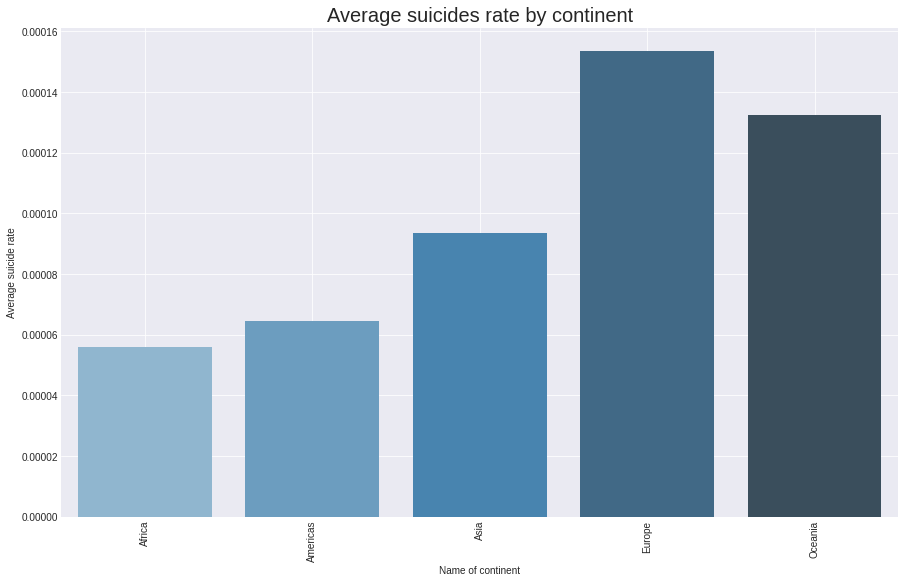

In [ ]:
# visualising the different suicides percentages by continents

import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (15, 9)

sns.barplot(grouped_continents['continent'], y = grouped_continents['percentage_of_suicide_in_pop'], data = grouped_continents, palette = 'Blues_d')
plt.title('Average suicides rate by continent', fontsize = 20)
plt.xlabel('Name of continent')
plt.xticks(rotation = 90)
plt.ylabel('Average suicide rate')
plt.grid()
plt.show()

Here we can see again, that the more the continent is reach and developed, it has higher rates of suicides. 

# **Suicides by Socio-Economic**

We will show the connection between the **suicide rate** and the **GDP** for each country over the years.

In [ ]:

# Group suicide data by country and year 
lastYear_df = suicide_master_df
lastYear_df_px = lastYear_df.groupby(['country', 'year']).agg({'population':'sum', 'suicides/100k pop': 'sum', 'gdp_per_capita ($)': 'mean'}).reset_index()

# Take the rate and sort the years for visualizations
lastYear_df_px['rate'] = lastYear_df_px['suicides/100k pop']
lastYear_df_px.sort_values(by=['year'], inplace=True)

lastYear_df_px

,country,year,population,suicides/100k pop,gdp_per_capita ($),rate
1350,Mauritius,1985,883400,143.13,1223,143.13
641,Dominica,1985,66400,0.00,1485,0.00
642,Ecuador,1985,7661800,82.52,2238,82.52
1869,Singapore,1985,2350500,353.36,8142,353.36
1851,Seychelles,1985,57300,156.18,2947,156.18
...,...,...,...,...,...,...
552,Croatia,2016,3567043,213.56,12905,213.56
180,Austria,2016,7484629,183.23,46976,183.23
618,Czech Republic,2016,8929942,161.76,19505,161.76
2111,Thailand,2016,53442001,77.32,6713,77.32


In [ ]:
import plotly.express as px

# Plot GDP and suicide rate for each country between 1985 to 2016.
# Every dot is a country and the size of the dot connected to the size of the population.
fig = px.scatter(lastYear_df_px, x="gdp_per_capita ($)", y="rate", size="population", color="country", log_x=True,
                animation_frame="year", range_x=[250,127000] )

fig.show()

You can see that smaller countries (a.k.a population size) have higher suicide rates. Big countries on the other hand, tends to stay on the bottom of the graph - lower suicide rate.

Another important thing to notice is a correlation between the **gdp** and **suicide rate**.

This correlation support our insight that developed countries have higher suicide rates. High Gdp implies rich country. 

In [ ]:
df_continents = df[['country', 'continent']]
df_continents

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


In [ ]:
country_socioeconomic_df.sort_values(by='child_mort', inplace=True)

# the table does not contain suicide data
# we need to use s_c table, and join the tables

grouped_countries = s_c[['percentage_of_suicide_in_pop','country']].groupby(['country']).agg('mean')
grouped_countries = grouped_countries.reset_index()

socio_countries = socio_continents.merge(grouped_countries, on='country', how='right')
socio_countries = socio_countries.dropna()


In [ ]:
# after merging suicide rates data with the socio economic table, we want to visualize the data by socio-economic properties
import plotly.express as px

fig = px.scatter(socio_countries, x="gdpp", y="percentage_of_suicide_in_pop",animation_group="country",
           color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, title="Country gdp & Suicides rates ")
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(socio_countries, x="child_mort", y="percentage_of_suicide_in_pop",animation_group="country",
           color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, title="Country's child mortality & Suicides rates ")
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(socio_countries, x="health", y="percentage_of_suicide_in_pop",animation_group="country",
           color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, title="Country's health & Suicides rates ")
fig.show()

In [ ]:
# child_mort	exports	health	imports	income	inflation	life_expec	total_fer	
import plotly.express as px
fig = px.scatter(socio_countries, x="imports", y="percentage_of_suicide_in_pop",animation_group="country",
           color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, title="Country's imports & Suicides rates ")
fig.show()

In [ ]:
# child_mort	exports	health	imports	income	inflation	life_expec	total_fer	
import plotly.express as px
fig = px.scatter(socio_countries, x="income", y="percentage_of_suicide_in_pop",animation_group="country",
           color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, title="Country's income & Suicides rates ")
fig.show()

In [ ]:
# child_mort	exports	health	imports	income	inflation	life_expec	total_fer	
import plotly.express as px
fig = px.scatter(socio_countries, x="inflation", y="percentage_of_suicide_in_pop",animation_group="country",
           color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, title="Country's inflation & Suicides rates ")
fig.show()

In [ ]:
# child_mort	exports	health	imports	income	inflation	life_expec	total_fer	
import plotly.express as px
fig = px.scatter(socio_countries, x="life_expec", y="percentage_of_suicide_in_pop",animation_group="country",
           color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, title="Country's life expectancy & Suicides rates ", range_x=[60,100], range_y=[-0.00001,0.0004])
fig.show()

In [ ]:
# child_mort	exports	health	imports	income	inflation	life_expec	total_fer	
import plotly.express as px
fig = px.scatter(socio_countries, x="total_fer", y="percentage_of_suicide_in_pop",animation_group="country",
           color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, title="Country's total fertility & Suicides rates ")
fig.show()

The above visualizations shows scatter of suicide rates and some socio-economic indices. 

# **Correlations**

* country: Name of the country.
* child_mort: Death of children under 5 years of age per 1000 live births
* exports: Exports of goods and services. Given as %age of the Total GDP
* health: Total health spending as %age of Total GDP
* imports: Imports of goods and services. Given as %age of the Total GDP
* Income: Net income per person
* Inflation: The measurement of the annual growth rate of the Total GDP
* life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
* total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.
* gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.

In [ ]:
# Group the dataset by country and year. And keep the population and suicde rate.
# Take only data from the year 2014

year = 2014
sum_suicide_master_df = suicide_master_df.groupby(['country', 'year']).agg({'population':'sum', 'suicides/100k pop': 'sum', 'gdp_per_capita ($)': 'mean'}).reset_index()
sum_suicide_master_df = sum_suicide_master_df[sum_suicide_master_df['year']==year]
# sum_suicide_master_df[sum_suicide_master_df['country']=='Israel']

# Merge the data with socio-economic data for each country.
merged_socio_master_df = pd.merge(sum_suicide_master_df, country_socioeconomic_df, left_on='country', right_on='country')
merged_socio_master_df

,country,year,population,suicides/100k pop,gdp_per_capita ($),child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Antigua and Barbuda,2014,90837,0.00,14093,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
1,Argentina,2014,39276555,111.35,13400,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
2,Armenia,2014,2803029,37.01,4142,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
3,Australia,2014,21927587,149.07,66809,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
4,Austria,2014,8141165,209.82,54278,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Ukraine,2014,40464165,250.50,3299,11.7,47.1,7.72,51.1,7820,13.400,70.4,1.44,2970
64,United Kingdom,2014,60570482,83.93,49906,5.2,28.2,9.64,30.8,36200,1.570,80.3,1.92,38900
65,United States,2014,297749735,171.33,58531,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400
66,Uruguay,2014,3177645,248.64,18012,10.6,26.3,8.35,25.4,17100,4.910,76.4,2.08,11900


In [ ]:
# Calculate correlation between suicide rate and socio-economic parameters, using different correlation methods

candidates = ['gdp_per_capita ($)',	'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer',	'gdpp']
methods = ['pearson', 'kendall', 'spearman']
corrs = {}
for cand in candidates:
    corrs[cand] = [round(merged_socio_master_df['suicides/100k pop'].corr(merged_socio_master_df[cand], method=meth), 7) for meth in methods]
corrs

{'child_mort': [-0.3509055, -0.2694621, -0.4221037],
 'exports': [0.0714507, 0.1032286, 0.1290452],
 'gdp_per_capita ($)': [0.0623506, 0.1154775, 0.2104841],
 'gdpp': [0.0632178, 0.1286498, 0.2259441],
 'health': [0.2767406, 0.2069875, 0.3234208],
 'imports': [0.0757304, 0.1050319, 0.1453289],
 'income': [-0.0477795, 0.0958242, 0.1752209],
 'inflation': [-0.0618624, -0.15236, -0.205808],
 'life_expec': [0.0374083, 0.0582015, 0.0760743],
 'total_fer': [-0.399906, -0.3219568, -0.4678057]}

We can see that the most significant parameters that correlate with the rate of suicide are **child mortality**, **total fertility**, and **health**.

We would try to explain this phenomenon, but we have an unusual idea that better living standards are connected to higher suicide rates. GDP, imports, income, and life expectancy may have a small correlation but support the idea. 

**child_mort**: better life level leads to better medical treatment, which decreases mortality among children. Thus opposite connection.

**health**: we said that the high suicide rate is tied to better life and better medical treatment again, leading to better health.

**life_expec**: harder to explain but places with fewer children associated with first world countries that have better life standards, in other words, low fertility, which explains the inverted connection.

high suicide rate -> high life standard -> fewer children -> lower fertility.

In [ ]:
import plotly.express as px

fig = px.scatter(merged_socio_master_df, x='suicides/100k pop', y='child_mort', color='country', title='suicides comparred to child mortality')
fig.show()

fig = px.scatter(merged_socio_master_df, x='suicides/100k pop', y='total_fer', color='country', title='suicides comparred to total fertility')
fig.show()

fig = px.scatter(merged_socio_master_df, x='suicides/100k pop', y='health', color='country', title='suicides comparred to health')
fig.show()


This 3 visualizations illustrate what we saw and explained earlier.

In total fertility it's quite simple to see the inverted connection and in health the direct correlation pretty clear either.

# **Suicides by country's Human Resources**

In [ ]:
# year has no meaning since it is only from 2016
del hr_suicide_df['Year']


In [ ]:
# rename to enable merge by 'country' column
hr_suicide_df.rename(columns={"Country": "country"}, inplace=True)

# merge this table with 'country-avg suicide' rate tables
hr_countries = hr_suicide_df.merge(grouped_countries, on='country', how='right')
hr_countries = hr_countries.dropna()

In [ ]:
# merge continents data with countries and hr data
hr_countries_continents = hr_countries.merge(g_continents, on='country', how='right')


In [ ]:
hr_countries_continents_Psychiatrists = hr_countries_continents[hr_countries_continents['Psychiatrists'].notna()]

fig = px.scatter(hr_countries_continents_Psychiatrists, x="Psychiatrists", y="percentage_of_suicide_in_pop", color="continent", hover_data=['country'])
fig.show()

In [ ]:
hr_countries_continents_Nurses = hr_countries_continents[hr_countries_continents['Nurses'].notna()]

fig = px.scatter(hr_countries_continents_Nurses, x="Nurses", y="percentage_of_suicide_in_pop", color="continent", hover_data=['country'], range_x=[-5,100])
fig.show()

In [ ]:
hr_countries_continents_Social_workers = hr_countries_continents[hr_countries_continents['Social_workers'].notna()]

fig = px.scatter(hr_countries_continents_Social_workers, x="Social_workers", y="percentage_of_suicide_in_pop", color="continent", hover_data=['country'], range_x=[-1,10])
fig.show()

In [ ]:
hr_countries_continents_Psychologists = hr_countries_continents[hr_countries_continents['Psychologists'].notna()]

fig = px.scatter(hr_countries_continents_Psychiatrists, x="Psychologists", y="percentage_of_suicide_in_pop", color="continent", hover_data=['country'], range_x=[-5, 15])
fig.show()

# **Day-light and Suicides**

In [ ]:

!kaggle datasets download sergedanson/countries-geolocation -p ./datasets/countries-geolocation -f countries_geolocation.csv
!unzip ./datasets/countries-geolocation/*.zip -d ./datasets/countries-geolocation

locations = pd.read_csv("./datasets/countries-geolocation/countries_geolocation.csv",
                        error_bad_lines=False, names=['code', 'lat', 'long', 'country'])
locations

  0% 0.00/8.13k [00:00<?, ?B/s]
100% 8.13k/8.13k [00:00<00:00, 13.2MB/s]
unzip:  cannot find or open ./datasets/countries-geolocation/*.zip, ./datasets/countries-geolocation/*.zip.zip or ./datasets/countries-geolocation/*.zip.ZIP.

No zipfiles found.


,code,lat,long,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


We want to see how far a country from the equator, the farther, the less daylight its has over the year and we want to see if there's a connection between suicide rate to amount of daylight.

In [ ]:
# Take absolute value of the latitude, because sign has no meaning for daylight.

locations['lat'] = locations['lat'].apply(abs)
locations = locations[['country','lat']]

locations

,country,lat
0,Andorra,42.546245
1,United Arab Emirates,23.424076
2,Afghanistan,33.939110
3,Antigua and Barbuda,17.060816
4,Anguilla,18.220554
...,...,...
240,Yemen,15.552727
241,Mayotte,12.827500
242,South Africa,30.559482
243,Zambia,13.133897


In [ ]:
# Take only one year of suicide data

year = 2014
year_suicide_who_df = suicide_who_df[suicide_who_df['year'] == year] # has most countries data in this year
year_suicide_who_df = year_suicide_who_df.groupby(['country','year']).agg({'population':'sum', 'suicides': 'sum'}).reset_index()
 
# calculate suicide rate
year_suicide_who_df['rate'] = year_suicide_who_df['suicides']/year_suicide_who_df['population']

# remove rows with zero values
year_suicide_who_df = year_suicide_who_df.loc[(year_suicide_who_df != 0).all(axis=1), :]

suicide_with_lat_df = pd.merge(year_suicide_who_df, locations, left_on='country', right_on='country')
suicide_with_lat_df

,country,year,population,suicides,rate,lat
0,Argentina,2014,39276555,3231,8.226282e-05,38.416097
1,Armenia,2014,2803029,58,2.069190e-05,40.069099
2,Aruba,2014,97988,5,5.102666e-05,12.521110
3,Australia,2014,21927587,2891,1.318431e-04,25.274398
4,Austria,2014,8141165,1314,1.614020e-04,47.516231
...,...,...,...,...,...,...
79,Turks and Caicos Islands,2014,19969080,1,5.007742e-08,21.694025
80,Ukraine,2014,40464165,7968,1.969150e-04,48.379433
81,United Kingdom,2014,60570482,4788,7.904841e-05,55.378051
82,Uruguay,2014,3177645,591,1.859868e-04,32.522779


In [ ]:
import plotly.express as px

# Plot countries' suicide rate and latitude

px.scatter(suicide_with_lat_df, x='rate', y='lat', color='country', range_x=[0, 0.000220])

The connection between **suicide rate** and **latitude** is very noticeable.

The conclusion is that countries with fewer day light over the year have higher suicide rate. (like Sweden, Iceland and Finland)

In [ ]:
# Calculate the correlation between suicide rate and latitude in the years 1987 - 2016 by 3 different methods.

year_suicide_who_df = suicide_who_df.copy() 

year_suicide_who_df = year_suicide_who_df.groupby(['country','year']).agg({'population':'sum', 'suicides': 'sum'}).reset_index()
 
year_suicide_who_df['rate'] = year_suicide_who_df['suicides']/year_suicide_who_df['population']

year_suicide_who_df = year_suicide_who_df.loc[(year_suicide_who_df != 0).all(axis=1), :]

suicide_with_lat_df = pd.merge(year_suicide_who_df, locations, left_on='country', right_on='country')
suicide_with_lat_df

years = range(1987, 2016)
methods = ['pearson', 'kendall', 'spearman']
correlations = {}
for year in years:
     suicide_with_lat_and_year = suicide_with_lat_df[suicide_with_lat_df['year'] == year]
     correlations[year] = { m:suicide_with_lat_and_year['rate'].corr(suicide_with_lat_and_year['lat'], method=m) for m in methods }
correlations


{1987: {'kendall': 0.4025225225225226,
  'pearson': 0.5717931084691118,
  'spearman': 0.614452347083926},
 1988: {'kendall': 0.4285714285714286,
  'pearson': 0.5720437425803245,
  'spearman': 0.6311200536552648},
 1989: {'kendall': 0.4248192161615318,
  'pearson': 0.5522961195500592,
  'spearman': 0.6152600158083658},
 1990: {'kendall': 0.45723805997778605,
  'pearson': 0.6066678275065156,
  'spearman': 0.6663754165124027},
 1991: {'kendall': 0.41006036217303826,
  'pearson': 0.5529733829958119,
  'spearman': 0.6107645875251507},
 1992: {'kendall': 0.4084507042253522,
  'pearson': 0.5481480291557015,
  'spearman': 0.6185110663983903},
 1993: {'kendall': 0.4053208137715179,
  'pearson': 0.5372181286386463,
  'spearman': 0.5974339185799731},
 1994: {'kendall': 0.40070175438596495,
  'pearson': 0.5438006483899739,
  'spearman': 0.5989063568010936},
 1995: {'kendall': 0.39974680038464044,
  'pearson': 0.5358466922124901,
  'spearman': 0.5890681497296987},
 1996: {'kendall': 0.4009878115365

In [ ]:
import plotly.graph_objects as go

# Plot the correlation we calculated earlier

methods = ['pearson', 'kendall', 'spearman']
years = list(years)
fig = go.Figure(data=[
    go.Bar(name='pearson', x=years, y=[v['pearson'] for v in correlations.values()]),
    go.Bar(name='kendall', x=years, y=[v['kendall'] for v in correlations.values()]),
    go.Bar(name='spearman', x=years, y=[v['spearman'] for v in correlations.values()])
])
# Change the bar mode
fig.update_layout(barmode='group', title_text='Correlation between amout of day light to suicide rate by 3 methods: pearson, kendall & spearman.')
fig.show()


# **Suicide trends**

In [ ]:
# let's take biggest countries

suicide_trend_who_df = suicide_who_df.copy()
suicide_trend_who_df[suicide_trend_who_df['year']==2015].groupby(['country']).agg({'population':'sum'}).sort_values('population').tail()

,population
country,
Mexico,114357884
Japan,120376310
Russian Federation,137018943
Brazil,191087085
United States of America,300078511


In [ ]:
suicide_trend_who_df = suicide_trend_who_df.loc[(suicide_trend_who_df != 0).all(axis=1), :]

suicide_trend_plot = suicide_trend_who_df.groupby(['country','year']).agg({'population':'sum', 'suicides': 'sum'})
suicide_trend_plot

population  suicides
country              year                      
Albania              1987     1915800        73
                     1988     2102100        63
                     1989     2094500        68
                     1992     2060300        47
                     1993     2768000        73
...                               ...       ...
Virgin Islands (USA) 2010       55288         8
                     2011       46689         8
                     2012       59941        10
                     2015       17125         3
Zimbabwe             1990    19969080       764

[3231 rows x 2 columns]

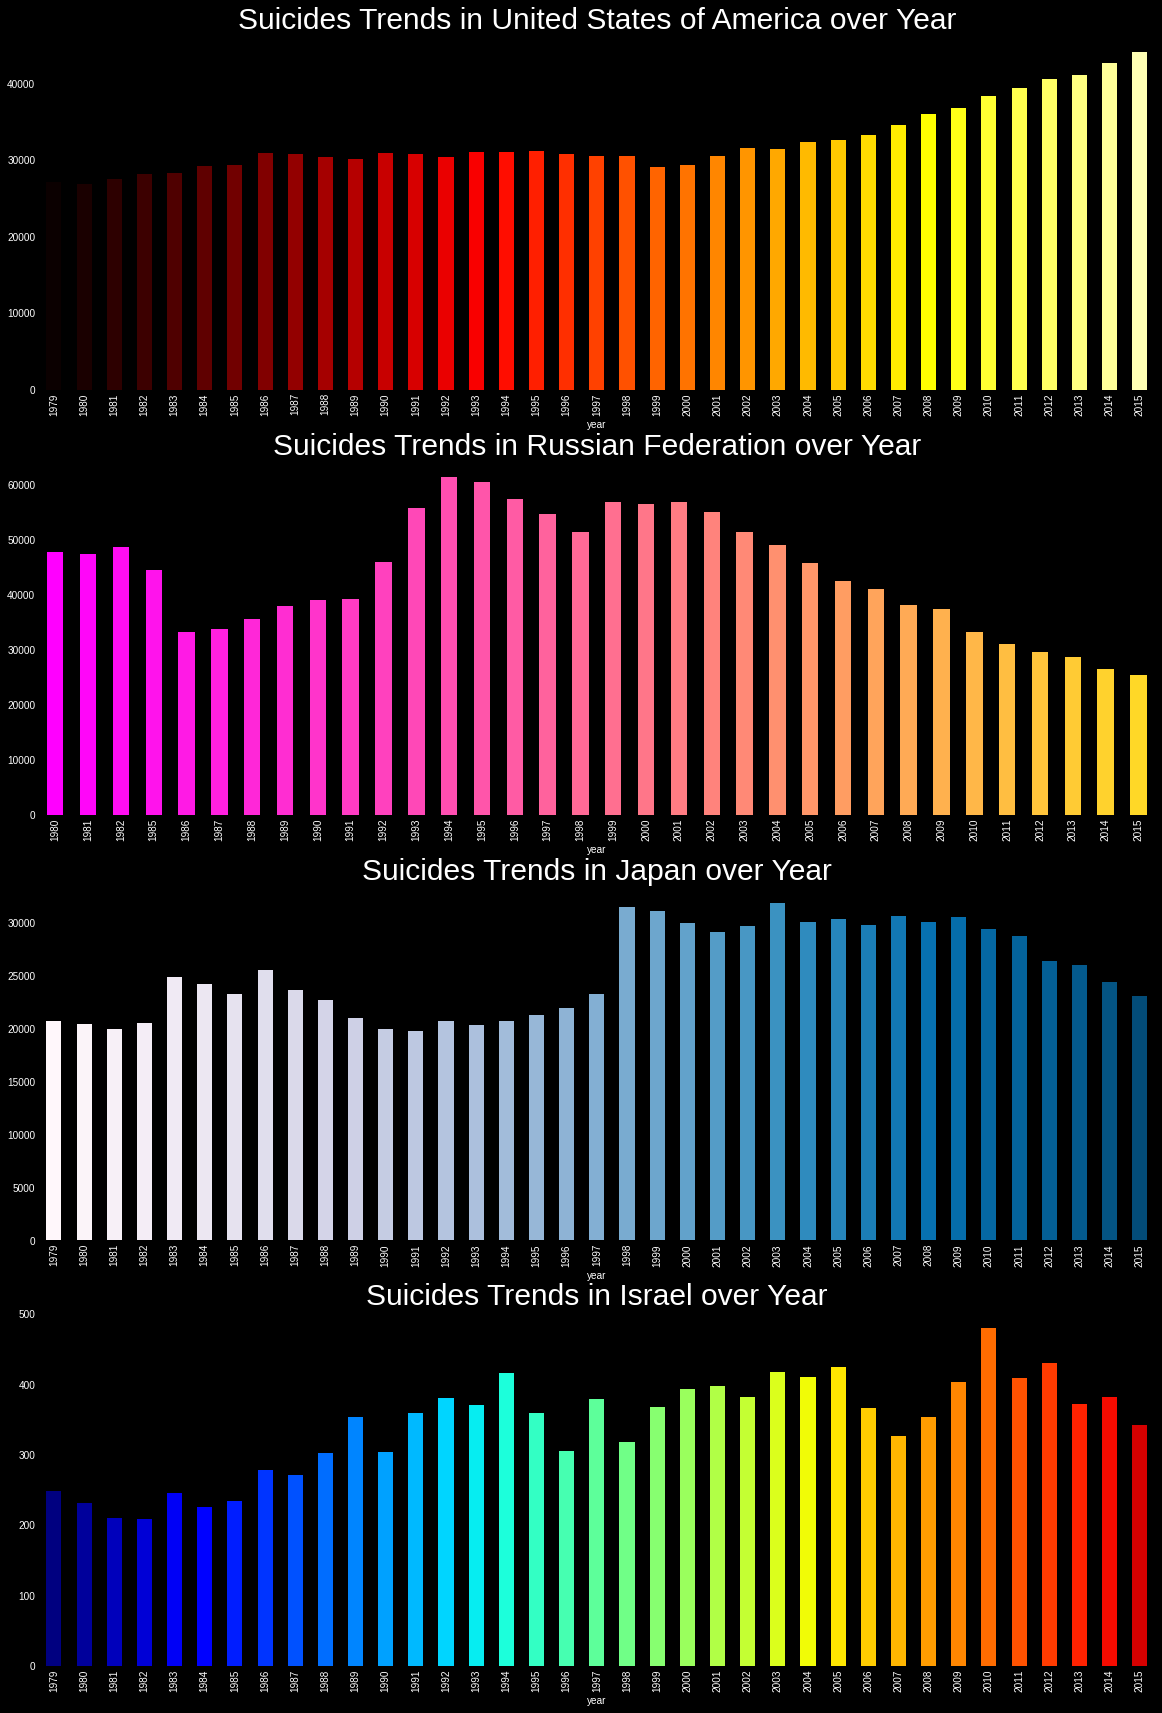

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# looking at the suicides trends for any 4 countries
plt.rcParams['figure.figsize'] = (20, 30)
plt.style.use('dark_background')

countries = ['United States of America', 'Russian Federation','Japan','Israel']
colors = [plt.cm.hot(np.linspace(0, 1, 40)), plt.cm.spring(np.linspace(0, 1, 40)),
          plt.cm.PuBu(np.linspace(0, 1, 40)), plt.cm.jet(np.linspace(0, 1, 40))]

for i in range(4):
    plt.subplot(4, 1, i+1)
    suicide_trend_plot['suicides'][countries[i]].plot.bar(color = colors[i])
    plt.title(f'Suicides Trends in {countries[i]} over Year', fontsize = 30)

plt.show()

In [ ]:
suicide_trend_plot = suicide_trend_who_df.groupby(['country','age']).agg({'suicides': 'mean'})
suicide_trend_plot

suicides
country  age                    
Albania  15-24 years   14.368421
         25-34 years   11.236842
         35-54 years   15.552632
         5-14 years     2.541667
         55-74 years    7.542857
...                          ...
Zimbabwe 25-34 years  104.500000
         35-54 years   88.500000
         5-14 years     6.000000
         55-74 years   47.000000
         75+ years      8.000000

[791 rows x 1 columns]

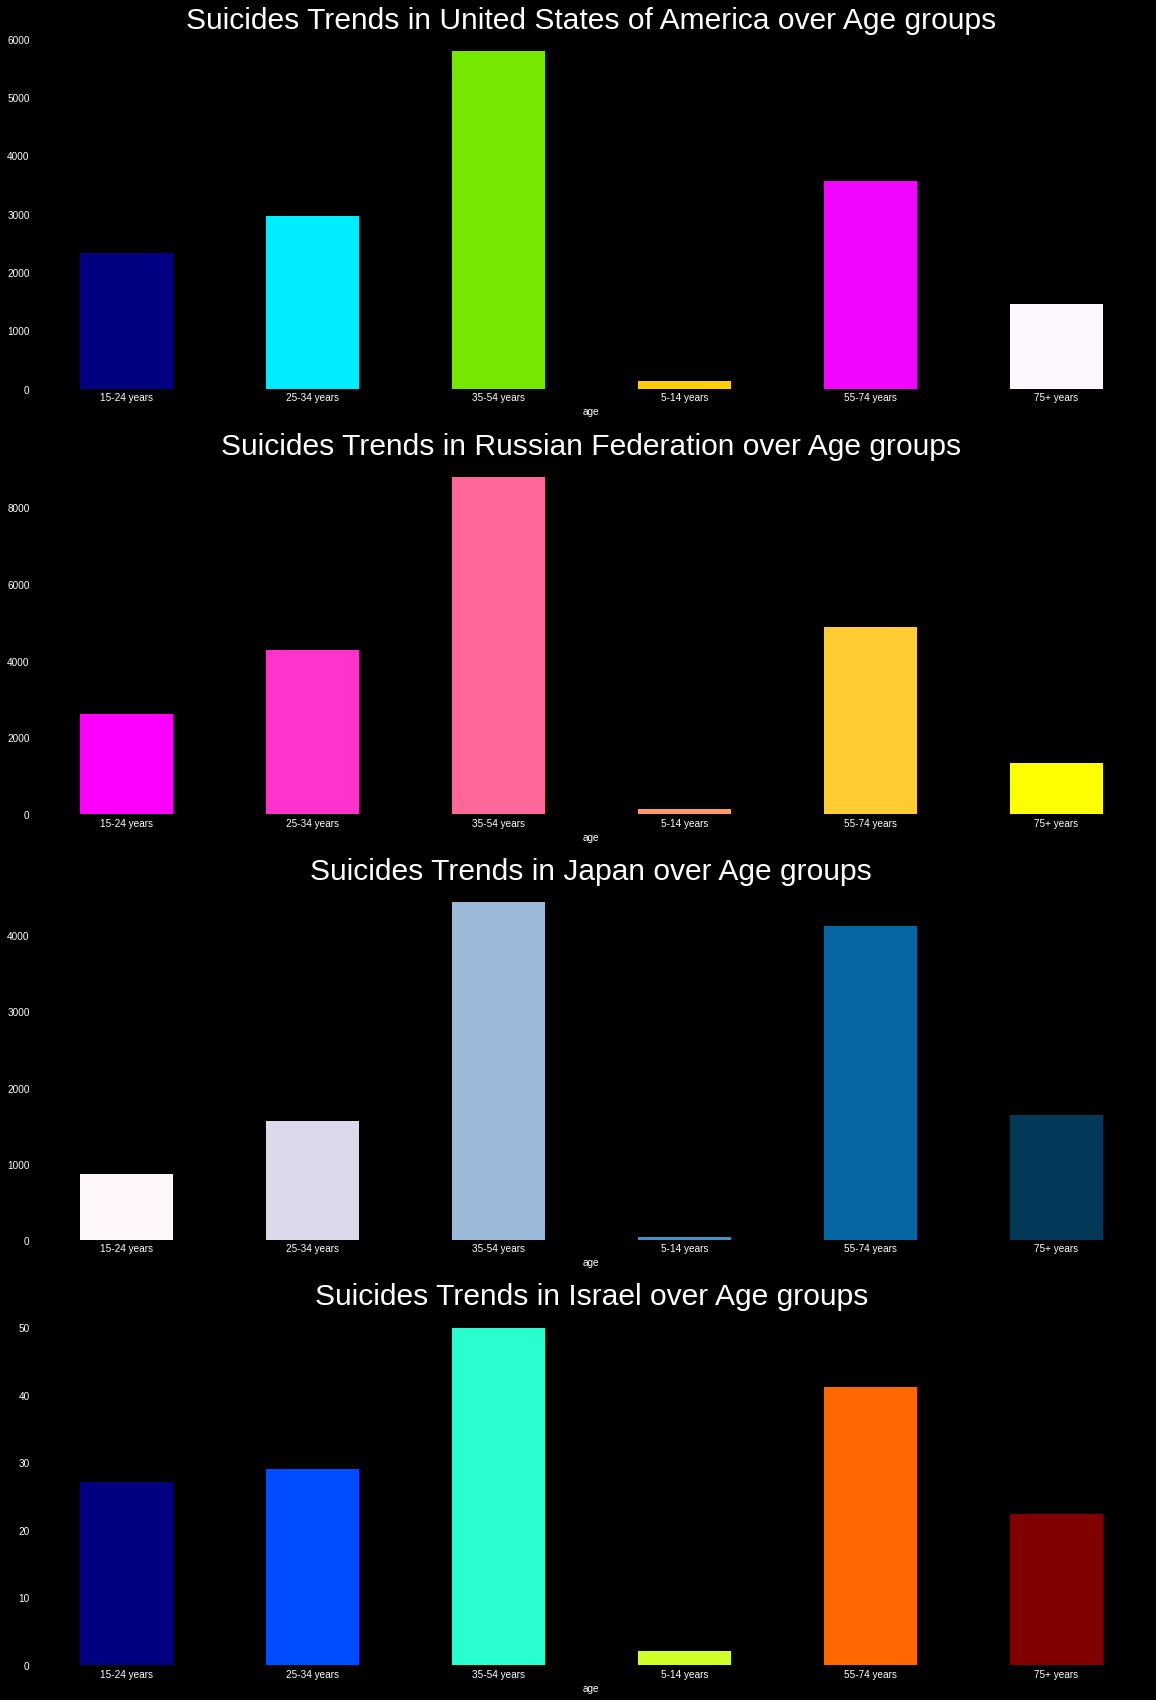

In [ ]:

colors = [plt.cm.gist_ncar(np.linspace(0, 1, 6)), plt.cm.spring(np.linspace(0, 1, 6)),
          plt.cm.PuBu(np.linspace(0, 1, 6)), plt.cm.jet(np.linspace(0, 1, 6))]

for i in range(4):
    plt.subplot(4, 1, i+1)
    suicide_trend_plot['suicides'][countries[i]].plot.bar(color = colors[i])
    plt.title(f'Suicides Trends in {countries[i]} over Age groups', fontsize = 30)
    plt.xticks(rotation = 0)

plt.show()

# **Predict suicides**

**Pre Process**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

suicide_ml_df = suicide_who_df.copy()

# suicide_ml_df = suicide_ml_df.replace([np.inf, -np.inf], np.nan)
# suicide_ml_df = suicide_ml_df.loc[~pd.isnull(suicide_ml_df.population)]
suicide_ml_df = suicide_ml_df.dropna()
# encoding gender and age

le = LabelEncoder()
suicide_ml_df['gender'] = le.fit_transform(suicide_ml_df['gender'])
suicide_ml_df['age'] = le.fit_transform(suicide_ml_df['age'])

# remove unnecessary column
suicide_ml_df = suicide_ml_df.drop(['country'], axis = 1)

# split example and label
x = suicide_ml_df.drop(['suicides'], axis = 1)
y = suicide_ml_df['suicides']

# print shapes
print("x shape and y shape:")
print(x.shape)
print(y.shape)

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 54)

print('\n x_train, y_train, x_test, y_test')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# creating a scaler
mm = MinMaxScaler()

# scale the data
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)



x shape and y shape:
(43776, 4)
(43776,)

 x_train, y_train, x_test, y_test
(32832, 4)
(32832,)
(10944, 4)
(10944,)


**Predictions**

**Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# create the model
model = LinearRegression()

# train
model.fit(x_train, y_train)

# predictiion of test set
y_pred = model.predict(x_test)

# calculate MSE
lin_mse = np.mean((y_test - y_pred)**2)
print("MSE :", lin_mse)

# calculate r^2
lin_r2 = r2_score(y_test, y_pred)
print("r2_score :", lin_r2)


MSE : 423877.84888066945
r2_score : 0.38082883710630455


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# create the model
model = RandomForestRegressor()

# train
model.fit(x_train, y_train)

# predictiion of test set
y_pred = model.predict(x_test)

# calculate MSE
rf_mse = np.mean((y_test - y_pred)**2)
print("MSE :", rf_mse)

# calculate r^2
rf_r2 = r2_score(y_test, y_pred)
print("r2_score :", rf_r2)


MSE : 122423.0142839516
r2_score : 0.8211730093485365


**Plot results**

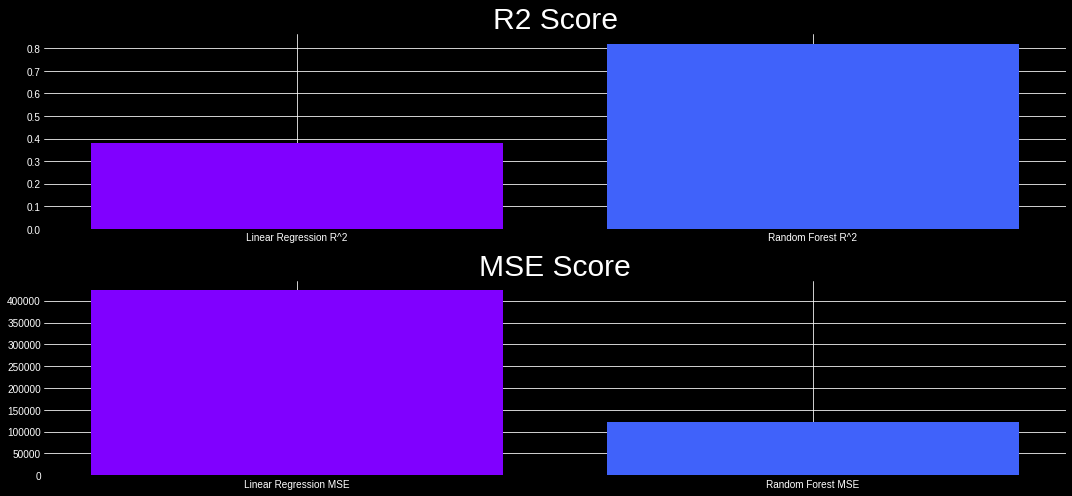

In [ ]:
# score of R^2
r2_scores = np.array([lin_r2, rf_r2])
r2_labels = np.array(['Linear Regression R^2', 'Random Forest R^2'])

# score of MSE
mse_scores = np.array([lin_mse, rf_mse])
mse_labels = np.array(['Linear Regression MSE', 'Random Forest MSE'])

# Plot style and size
color = plt.cm.rainbow(np.linspace(0, 1, 9))
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 7)

# plot results
plt.subplot(2, 1, 1)

plt.bar(range(len(r2_scores)), r2_scores, color = color)
plt.xticks(range(len(r2_labels)), r2_labels)
plt.title('R2 Score', fontsize = 30)
plt.grid()
plt.tight_layout()

plt.subplot(2, 1, 2)

plt.bar(range(len(mse_scores)), mse_scores, color = color)
plt.xticks(range(len(mse_labels)), mse_labels)
plt.title('MSE Score', fontsize = 30)
plt.grid()
plt.tight_layout()

plt.show()

The Random Forest model predicted better countries suicide rates than linear regression.

In MSE (minimum squared error), lower score means higher accuracy.

In R^2 score, as the score closer to 1, the accuracy is better. 